In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
dataset = pd.read_csv("AirPassengers.csv")

In [3]:
#parse strings to datetime type

dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

C:\Users\zenda\AppData\Local\Temp\ipykernel_5468\3280805618.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)


In [4]:
dataset.head(10)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [5]:
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


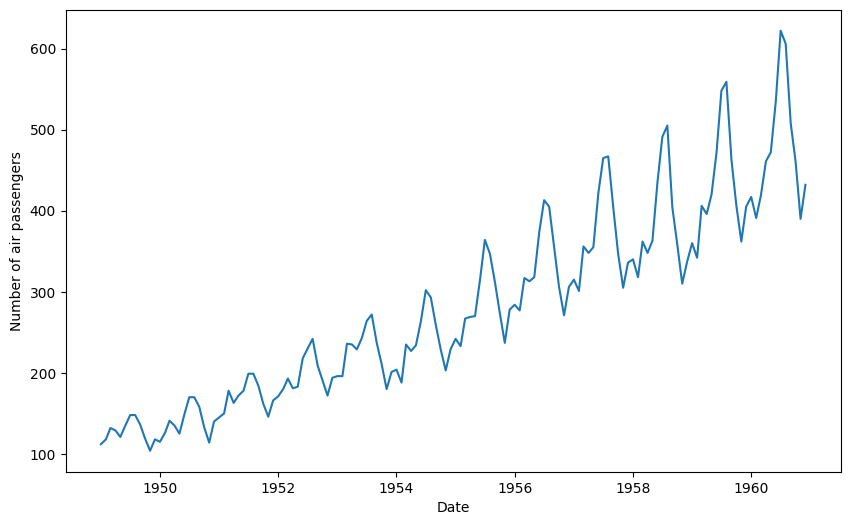

In [6]:
##Plot graph

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [7]:
#Rolling statistics (Moving Average)

rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


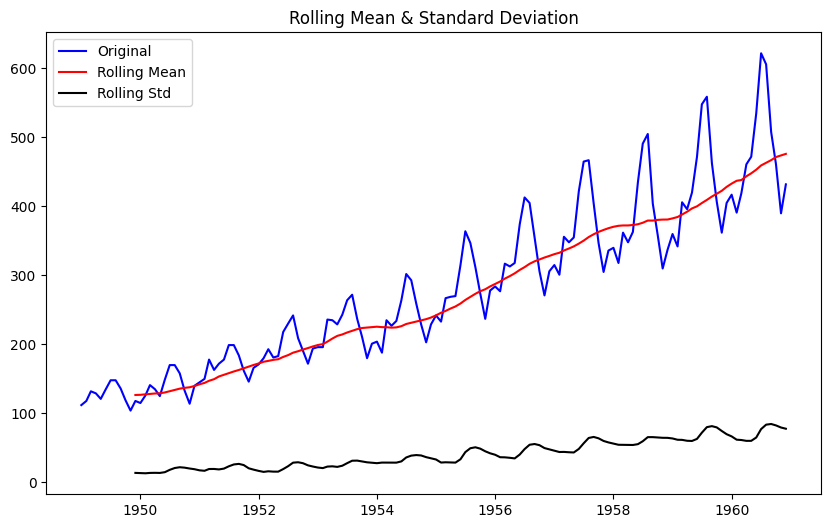

In [8]:
#Plot rolling mean and std data
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [9]:
#Perform Dickey-Fuller test
##To check if the time series is stationary or not


dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


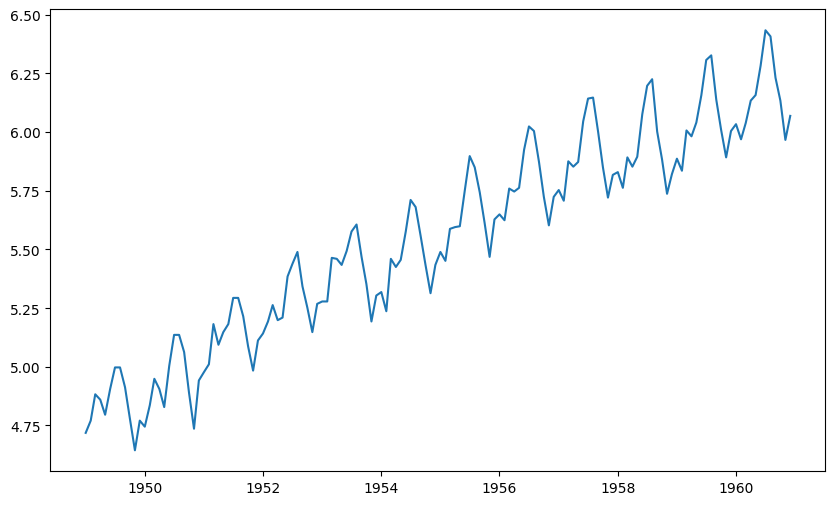

In [10]:
#Estimating Trends
##the graph plot remains the same but the values on y-axis has changed as we took the log of indexedDataset
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

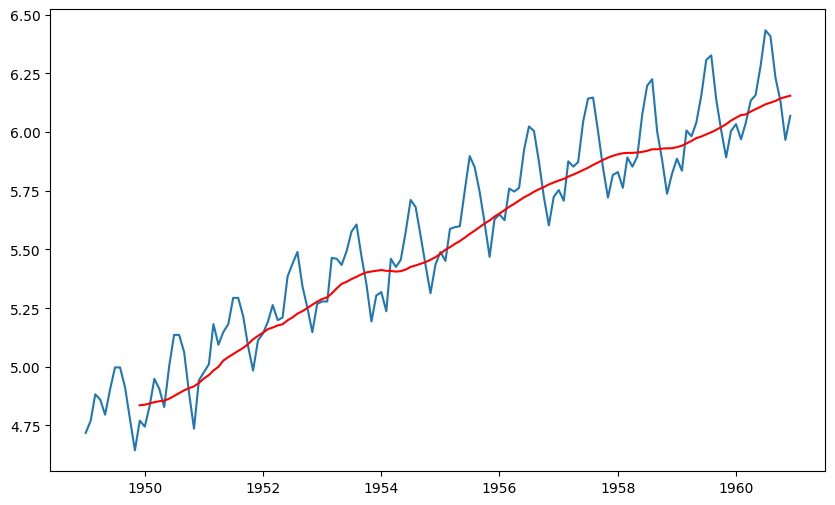

In [11]:
#Moving Average

movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [12]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [13]:
def test_stationary(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

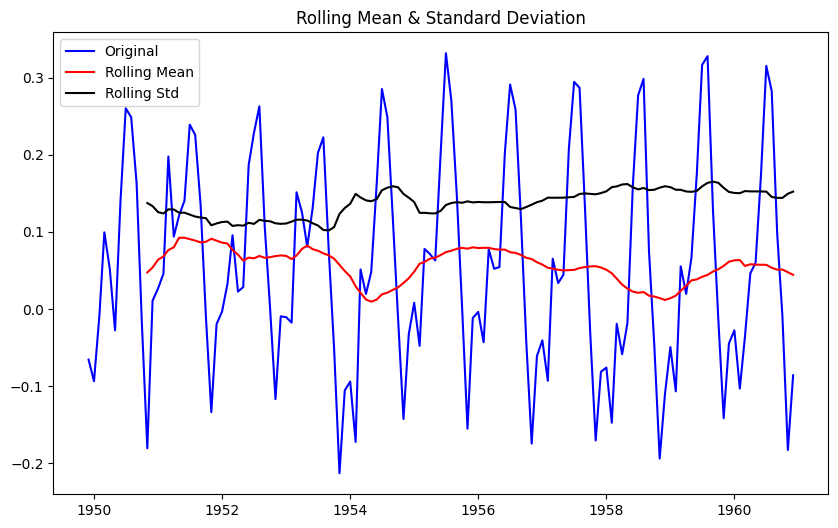

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
test_stationary(datasetLogScaleMinusMovingAverage)

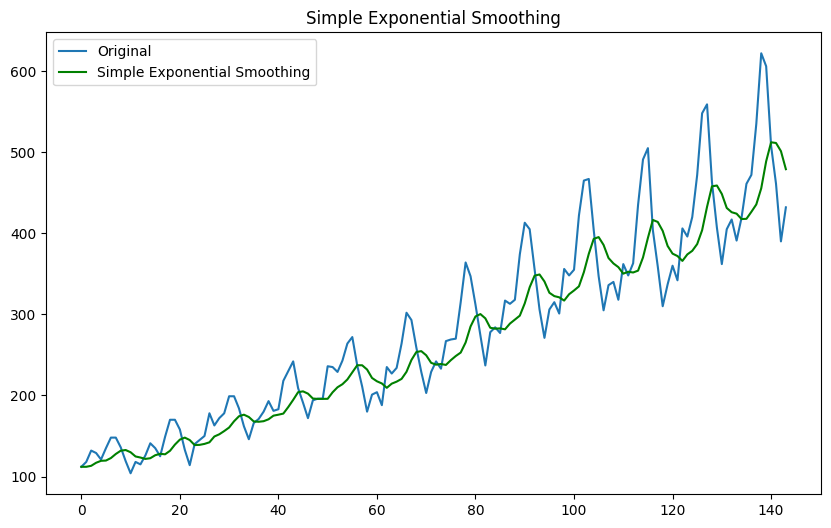

In [15]:
ses_model = SimpleExpSmoothing(dataset['#Passengers']).fit(smoothing_level=0.2, optimized=False)
dataset['SES'] = ses_model.fittedvalues

plt.figure(figsize=(10,6))
plt.plot(dataset['#Passengers'], label='Original')
plt.plot(dataset['SES'], label='Simple Exponential Smoothing', color='green')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

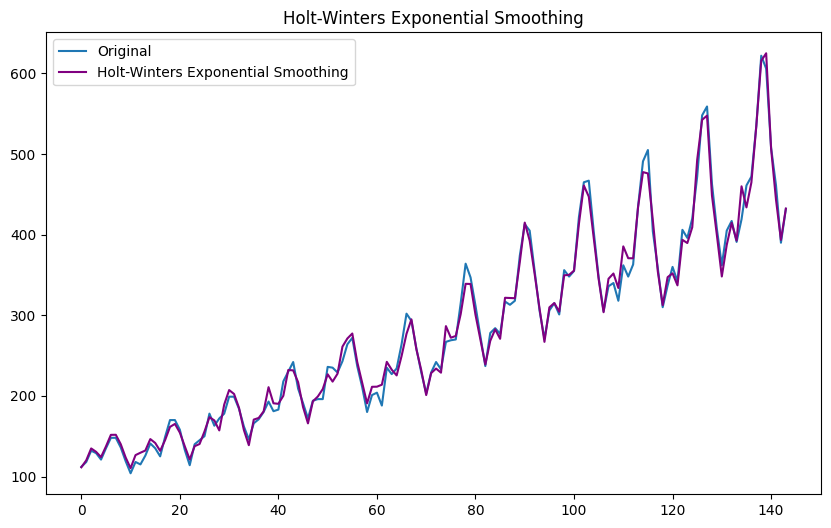

In [16]:
hw_model = ExponentialSmoothing(dataset['#Passengers'], trend='add', seasonal='mul', seasonal_periods=12).fit()
dataset['Holt_Winters'] = hw_model.fittedvalues

plt.figure(figsize=(10,6))
plt.plot(dataset['#Passengers'], label='Original')
plt.plot(dataset['Holt_Winters'], label='Holt-Winters Exponential Smoothing', color='purple')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

16:37:12 - cmdstanpy - INFO - Chain [1] start processing
16:37:12 - cmdstanpy - INFO - Chain [1] done processing


            ds    y
0   1949-01-01  112
1   1949-02-01  118
2   1949-03-01  132
3   1949-04-01  129
4   1949-05-01  121
..         ...  ...
139 1960-08-01  606
140 1960-09-01  508
141 1960-10-01  461
142 1960-11-01  390
143 1960-12-01  432

[144 rows x 2 columns]


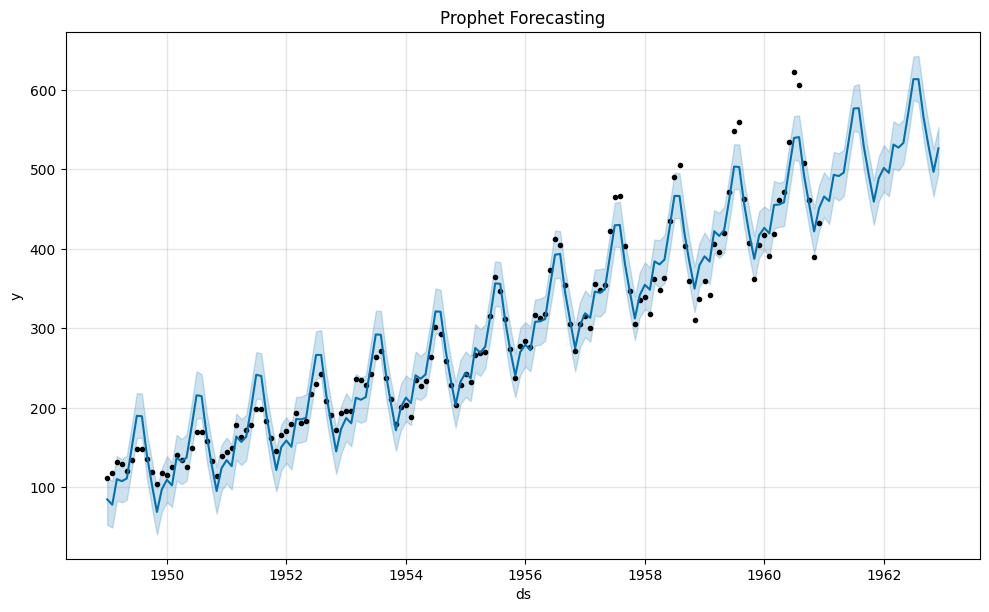

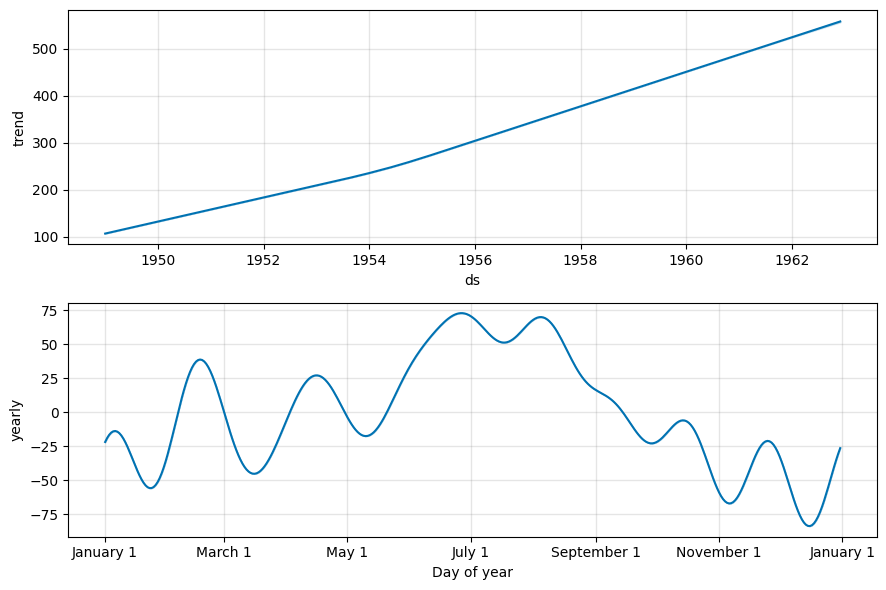

In [17]:
df_prophet = dataset.reset_index()[['Month', '#Passengers']].rename({'Month':'ds', '#Passengers':'y'}, axis='columns')
print(df_prophet)

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)

model.plot(forecast)
plt.title('Prophet Forecasting')
plt.show()

model.plot_components(forecast)
plt.show()

In [18]:
train_data = indexedDataset_logScale[:-24]
validation_data = indexedDataset_logScale[-24:]

In [19]:
# Moving Average
moving_avg_forecast = train_data.rolling(window=12).mean().iloc[-1].values
moving_avg_forecast = np.repeat(moving_avg_forecast, 24)

In [20]:
# Holt-Winters Exponential Smoothing
hw_model_train = ExponentialSmoothing(train_data['#Passengers'], trend='add', seasonal='mul', seasonal_periods=12).fit()
hw_forecast = hw_model_train.forecast(steps=24)

c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
# prophet model
train_df_prophet = train_data.reset_index()[['Month', '#Passengers']].rename({'Month': 'ds', '#Passengers': 'y'}, axis='columns')

model_prophet_train = Prophet()
model_prophet_train.fit(train_df_prophet)

future_validation = model_prophet_train.make_future_dataframe(periods=24, freq='MS')
forecast_prophet = model_prophet_train.predict(future_validation)

prophet_forecast = forecast_prophet['yhat'][-24:].values

16:37:15 - cmdstanpy - INFO - Chain [1] start processing
16:37:15 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# ARIMA Model

arima_order = (2, 1, 2)
arima_model_train = ARIMA(train_data['#Passengers'], order=arima_order)
arima_model_fitted = arima_model_train.fit()

arima_forecast = arima_model_fitted.forecast(steps=24)

c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
#SARIMAX Model

sarimax_order = (2, 1, 2)  # Non-seasonal ARIMA part
seasonal_order = (1, 1, 1, 12)  # Seasonal part (P, D, Q, m), with a 12-month seasonality

sarimax_model_train = SARIMAX(train_data['#Passengers'], order=sarimax_order, seasonal_order=seasonal_order)
sarimax_model_fitted = sarimax_model_train.fit()

# Forecast for the validation period (next 24 months)
sarimax_forecast = sarimax_model_fitted.forecast(steps=24)

c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
def mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Actual validation data
validation_actual = validation_data['#Passengers'].values

# Calculate MAPE for each model
moving_avg_mape = mape(validation_actual, moving_avg_forecast)
hw_mape = mape(validation_actual, hw_forecast)
prophet_mape = mape(validation_actual, prophet_forecast)
arima_mape = mape(validation_actual, arima_forecast)
sarimax_mape = mape(validation_actual, sarimax_forecast)

print(f"Moving Average MAPE: {moving_avg_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"Prophet MAPE: {prophet_mape:.2f}%")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMAX MAPE: {sarimax_mape:.2f}%")

Moving Average MAPE: 2.99%
Holt-Winters MAPE: 0.97%
Prophet MAPE: 1.14%
ARIMA MAPE: 3.26%
SARIMAX MAPE: 1.27%


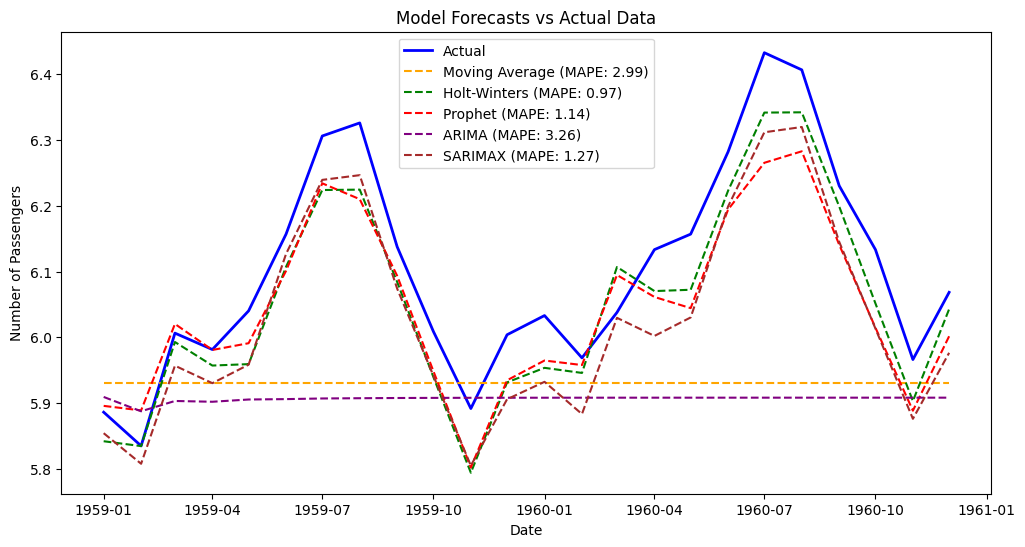

In [25]:
plt.figure(figsize=(12,6))

# Plot actual validation data
plt.plot(validation_data.index, validation_actual, label='Actual', color='blue', linewidth=2)

# Plot Moving Average forecast
plt.plot(validation_data.index, moving_avg_forecast, label=f'Moving Average (MAPE: {moving_avg_mape:.2f})', color='orange', linestyle='--')

# Plot Holt-Winters forecast
plt.plot(validation_data.index, hw_forecast, label=f'Holt-Winters (MAPE: {hw_mape:.2f})', color='green', linestyle='--')

# Plot Prophet forecast
plt.plot(validation_data.index, prophet_forecast, label=f'Prophet (MAPE: {prophet_mape:.2f})', color='red', linestyle='--')

# Plot ARIMA forecast
plt.plot(validation_data.index, arima_forecast, label=f'ARIMA (MAPE: {arima_mape:.2f})', color='purple', linestyle='--')

# Plot SARIMAX forecast
plt.plot(validation_data.index, sarimax_forecast, label=f'SARIMAX (MAPE: {sarimax_mape:.2f})', color='brown', linestyle='--')

# Titles and labels
plt.title('Model Forecasts vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')

# Show plot
plt.show()

In [26]:
# Retrain Holt-Winters on the entire dataset and forecast the next 60 months
hw_model_full = ExponentialSmoothing(indexedDataset_logScale['#Passengers'], trend='add', seasonal='mul', seasonal_periods=12).fit()
hw_full_forecast = hw_model_full.forecast(steps=60)

c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


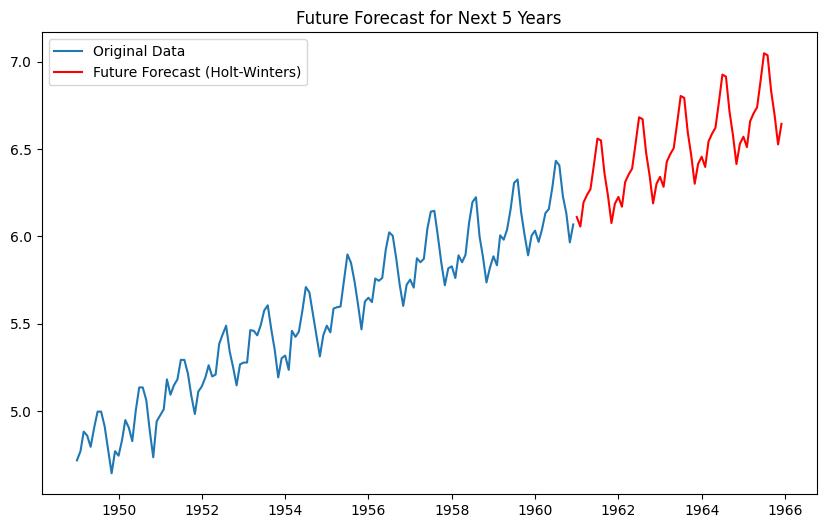

In [27]:
plt.figure(figsize=(10,6))
plt.plot(indexedDataset_logScale, label='Original Data')
plt.plot(pd.date_range(start=indexedDataset_logScale.index[-1], periods=61, freq='MS')[1:], hw_full_forecast, label='Future Forecast (Holt-Winters)', color='red')
plt.title('Future Forecast for Next 5 Years')
plt.legend()
plt.show()

In [28]:
# Retrain Prophet on the entire dataset and forecast the next 60 months
full_data_prophet = indexedDataset_logScale.reset_index()[['Month', '#Passengers']].rename({'Month': 'ds', '#Passengers': 'y'}, axis='columns')

# Fit Prophet on the full data
prophet_model_full = Prophet()
prophet_model_full.fit(full_data_prophet)

# Create future dataframe for next 60 months
future_prophet_full = prophet_model_full.make_future_dataframe(periods=60, freq='MS')
forecast_prophet_full = prophet_model_full.predict(future_prophet_full)

# Back-transform Prophet forecast
prophet_full_forecast_back = np.exp(forecast_prophet_full['yhat'][-60:].values)

16:37:28 - cmdstanpy - INFO - Chain [1] start processing
16:37:28 - cmdstanpy - INFO - Chain [1] done processing


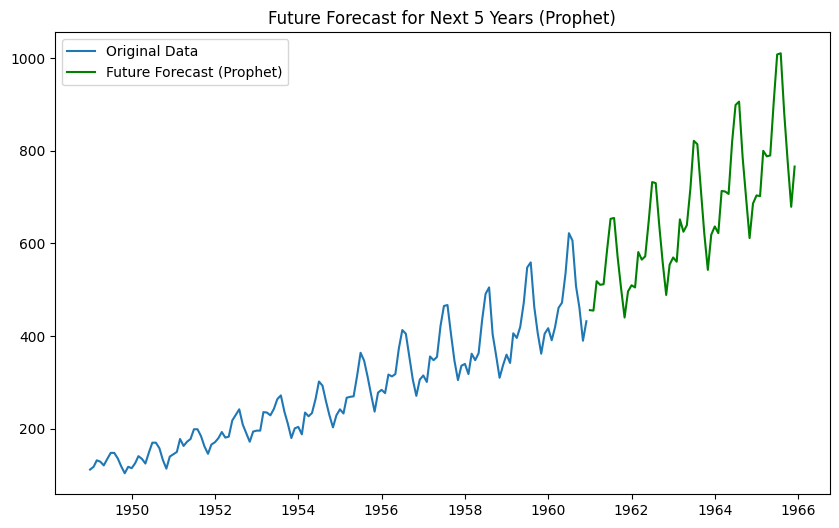

In [29]:
# Plot Prophet future forecast
plt.figure(figsize=(10,6))
plt.plot(np.exp(indexedDataset_logScale), label='Original Data')
plt.plot(pd.date_range(start=indexedDataset_logScale.index[-1], periods=61, freq='MS')[1:], prophet_full_forecast_back, label='Future Forecast (Prophet)', color='green')
plt.title('Future Forecast for Next 5 Years (Prophet)')
plt.legend()
plt.show()

In [30]:
# Retrain SARIMAX on the entire dataset and forecast the next 60 months
sarimax_model_full = SARIMAX(indexedDataset_logScale['#Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

sarimax_full_forecast = sarimax_model_full.get_forecast(steps=60).predicted_mean

# Back-transform SARIMAX forecast
sarimax_full_forecast_back = np.exp(sarimax_full_forecast)

c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zenda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


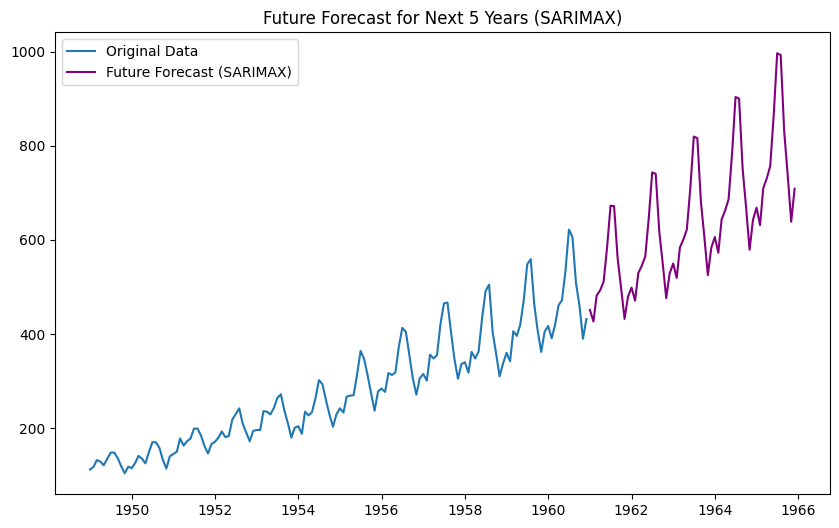

In [31]:
# Plot SARIMAX future forecast
plt.figure(figsize=(10,6))
plt.plot(np.exp(indexedDataset_logScale), label='Original Data')
plt.plot(pd.date_range(start=indexedDataset_logScale.index[-1], periods=61, freq='MS')[1:], sarimax_full_forecast_back, label='Future Forecast (SARIMAX)', color='purple')
plt.title('Future Forecast for Next 5 Years (SARIMAX)')
plt.legend()
plt.show()